In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"['aws', 'azure']","{'cloud': ['aws', 'azure']}",3


In [8]:

df_DA_explode= df_DA.explode('job_skills')

In [10]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_pivot

job_skills,"['airflow', 'docker', 'kubernetes']","['airflow', 'flow']","['airflow', 'spark', 'hadoop', 'kafka', 'linux']","['airflow', 'spark', 'kubernetes']","['airflow', 'ssis', 'tableau', 'power bi']","['airflow', 'tableau', 'power bi', 'git']",['airflow'],"['airtable', 'notion']",['airtable'],"['alteryx', 'confluence']",...,"['word', 'terminal', 'zoom']","['word', 'terminal']","['word', 'visio', 'excel', 'powerpoint']","['word', 'visio', 'excel', 'sharepoint']","['word', 'zoom']",['word'],['workfront'],"['zoom', 'microsoft teams', 'webex']","['zoom', 'microsoft teams']",['zoom']
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,0,0,1,0,0,...,1,0,0,2,0,52,0,0,0,40
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,40,0,0,1,3
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,27,0,0,0,5
4,0,0,0,0,0,2,1,0,1,0,...,0,1,0,1,0,50,0,0,1,5
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,22,1,0,0,2
6,0,0,0,0,0,0,0,0,5,0,...,0,0,0,2,0,31,0,0,1,4
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,25,0,0,0,1
8,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,44,0,0,0,2
9,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,26,0,0,0,1


In [13]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [14]:

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,['excel'],['sql'],"['sql', 'excel']",['sap'],"['sql', 'python']",['power bi'],"['sql', 'tableau']",['go'],['tableau'],"['sql', 'power bi']",...,"['angular', 'sap', 'jira', 'confluence']","['apl', 'excel']","['word', 'excel', 'sheets']","['word', 'excel', 'smartsheet']","['word', 'excel', 'spss', 'power bi']","['word', 'excel', 'tableau', 'powerpoint', 'smartsheet']","['word', 'excel', 'tableau']","['word', 'excel', 'unity']","['word', 'excel', 'visio', 'powerpoint', 'tableau']","['alteryx', 'tableau', 'power bi', 'excel']"
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,965,640,381,178,169,178,212,149,163,107,...,0,0,0,0,0,0,0,1,0,0
2,683,434,288,136,135,132,118,89,124,82,...,0,0,0,0,0,0,0,0,0,1
3,648,468,285,115,116,122,151,103,135,77,...,0,0,0,0,0,1,0,0,0,0
4,568,372,354,126,108,114,105,96,107,84,...,0,0,0,0,0,0,1,0,0,0
5,538,327,242,127,114,87,105,98,77,57,...,0,0,0,0,0,0,0,0,0,0
6,691,410,270,184,126,157,104,113,77,88,...,0,0,0,0,0,0,0,0,0,0
7,611,406,192,167,134,165,102,106,87,75,...,0,0,0,0,1,0,0,0,0,0
8,840,446,239,166,151,160,124,114,116,99,...,1,0,0,0,0,0,0,0,0,0
9,582,380,213,120,161,102,86,120,79,83,...,0,1,1,0,0,0,0,0,1,0


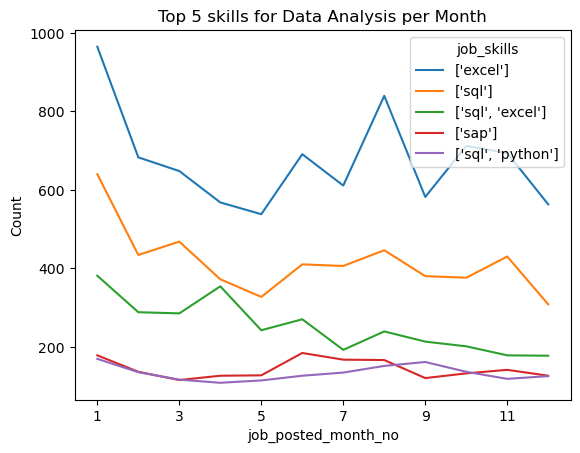

In [16]:

df_DA_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Top 5 skills for Data Analysis per Month')
plt.ylabel('Count')
plt.show()

In [17]:
# code snippet from `6_Exercise_Job_Demand.ipynb`
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot

job_skills,['excel'],['sql'],"['sql', 'excel']",['sap'],"['sql', 'python']",['power bi'],"['sql', 'tableau']",['go'],['tableau'],"['sql', 'power bi']",...,"['angular', 'sap', 'jira', 'confluence']","['apl', 'excel']","['word', 'excel', 'sheets']","['word', 'excel', 'smartsheet']","['word', 'excel', 'spss', 'power bi']","['word', 'excel', 'tableau', 'powerpoint', 'smartsheet']","['word', 'excel', 'tableau']","['word', 'excel', 'unity']","['word', 'excel', 'visio', 'powerpoint', 'tableau']","['alteryx', 'tableau', 'power bi', 'excel']"
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,965,640,381,178,169,178,212,149,163,107,...,0,0,0,0,0,0,0,1,0,0
Feb,683,434,288,136,135,132,118,89,124,82,...,0,0,0,0,0,0,0,0,0,1
Mar,648,468,285,115,116,122,151,103,135,77,...,0,0,0,0,0,1,0,0,0,0
Apr,568,372,354,126,108,114,105,96,107,84,...,0,0,0,0,0,0,1,0,0,0
May,538,327,242,127,114,87,105,98,77,57,...,0,0,0,0,0,0,0,0,0,0
Jun,691,410,270,184,126,157,104,113,77,88,...,0,0,0,0,0,0,0,0,0,0
Jul,611,406,192,167,134,165,102,106,87,75,...,0,0,0,0,1,0,0,0,0,0
Aug,840,446,239,166,151,160,124,114,116,99,...,1,0,0,0,0,0,0,0,0,0
Sep,582,380,213,120,161,102,86,120,79,83,...,0,1,1,0,0,0,0,0,1,0


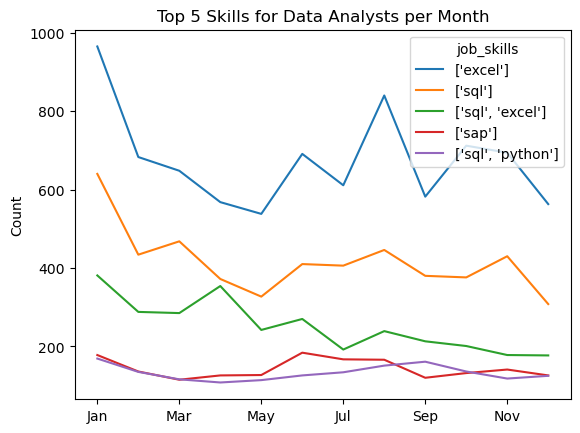

In [18]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()